In [1]:
! pip install  torch numpy healpy  matplotlib scipy pandas pypdf
from SpectralComplexity import *

path_root = '/Users/simmaco/Desktop/Dottorato'
path_out =os.path.join(path_root, 'plot')


Defaulting to user installation because normal site-packages is not writeable


Set variable

In [2]:
Activation= ['ReLu', 'tanh', 'Gaussian']

res = 9
n = 1000
L_list = [1,20,40,60,80]
n_samples = 1000

Generate_sample

In [ ]:
for act in Activation: 
    NN = NeuralNetwork(act,res,L_list,n)
    NN.generate(n_samples)
    NN.merge_cl()
    NN.mean_sperimental(generate  = True)
    NN.compute_range()

Plot mollview

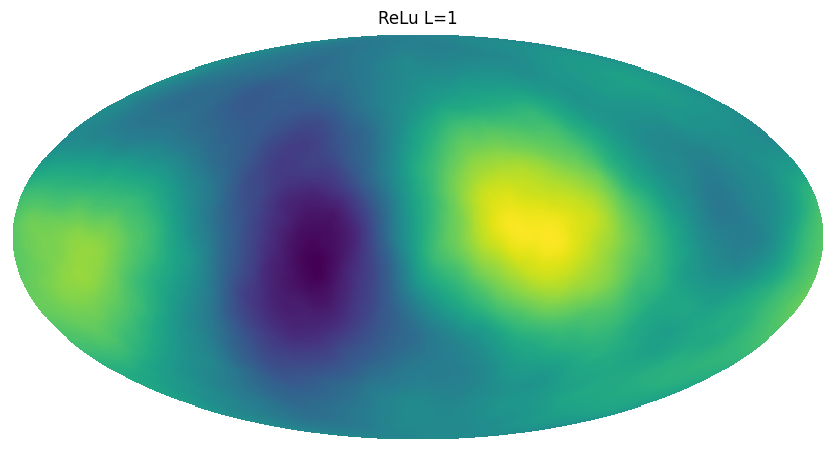

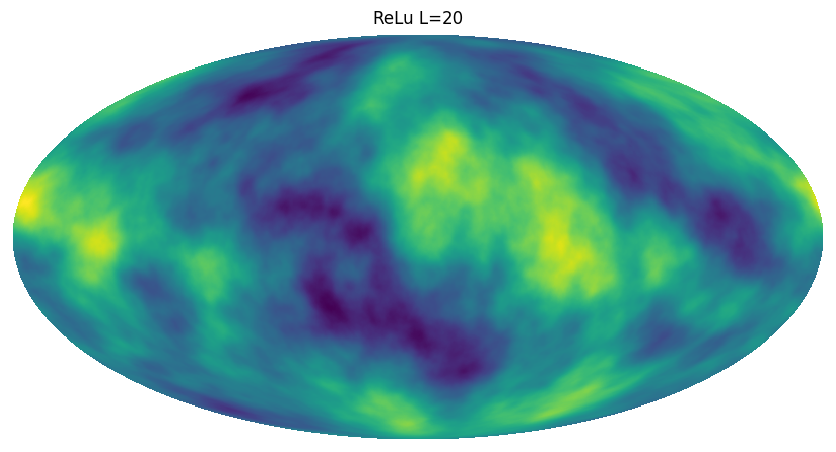

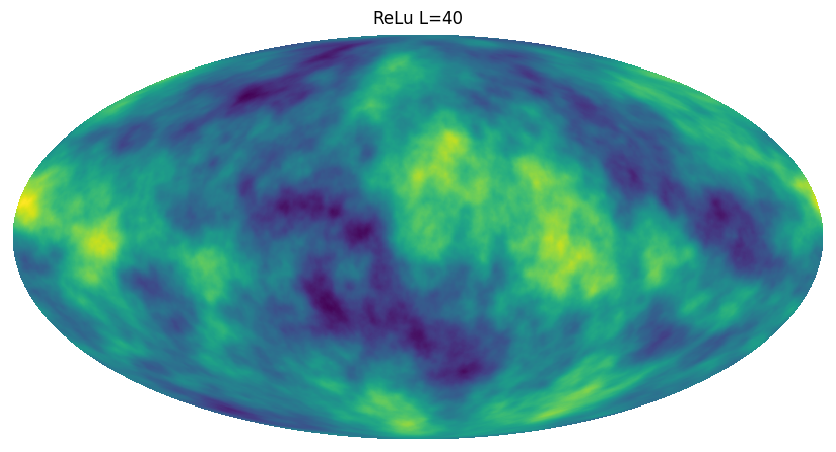

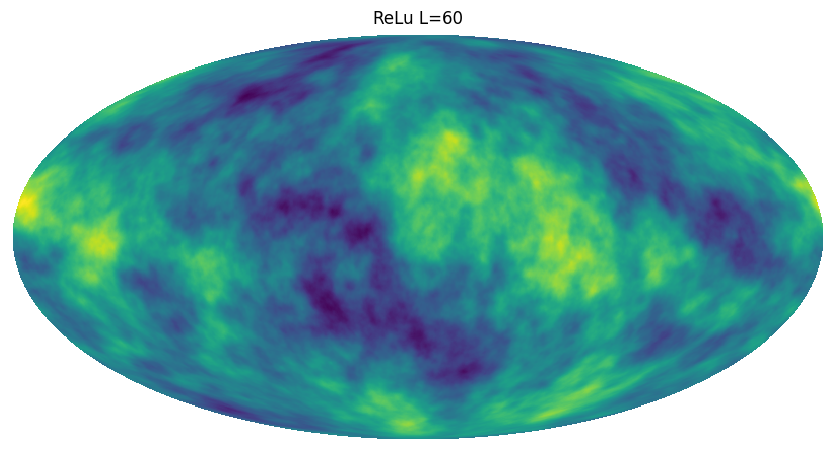

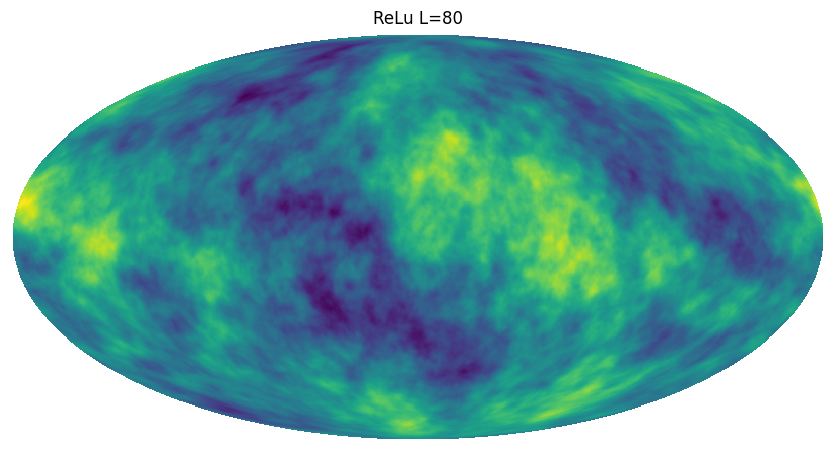

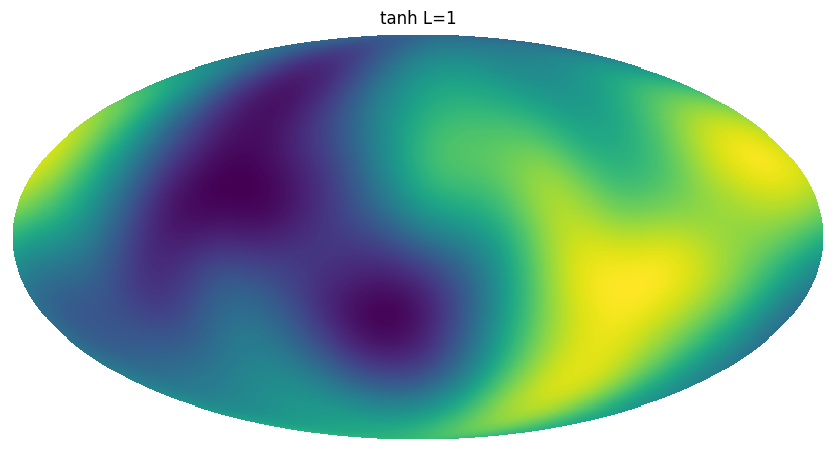

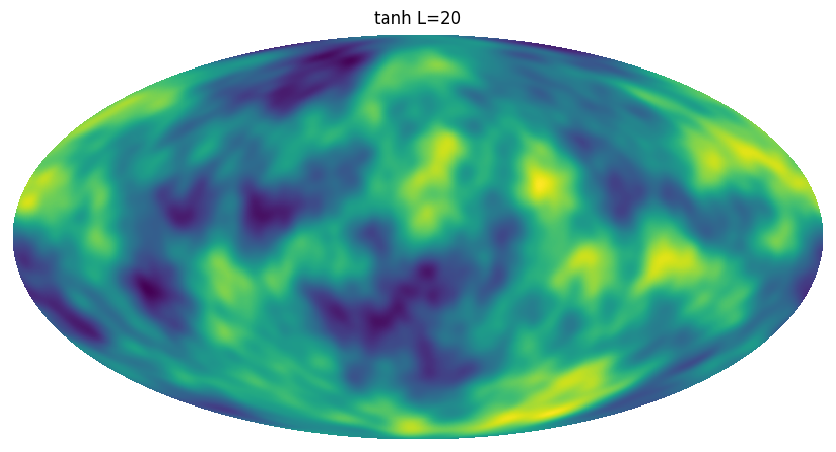

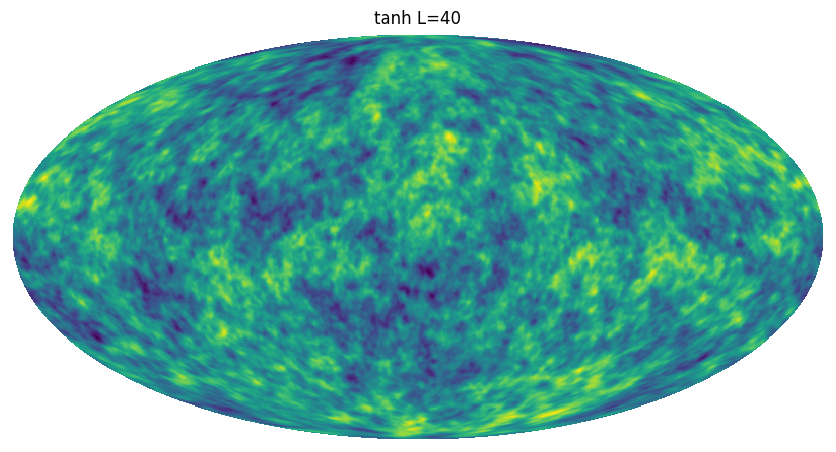

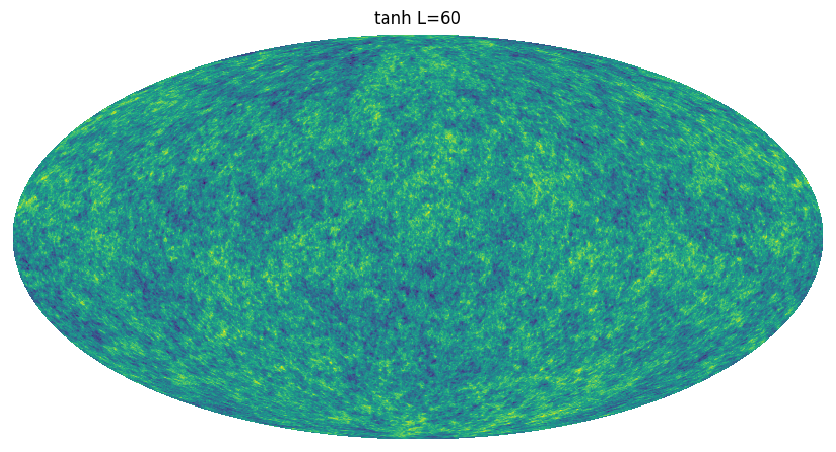

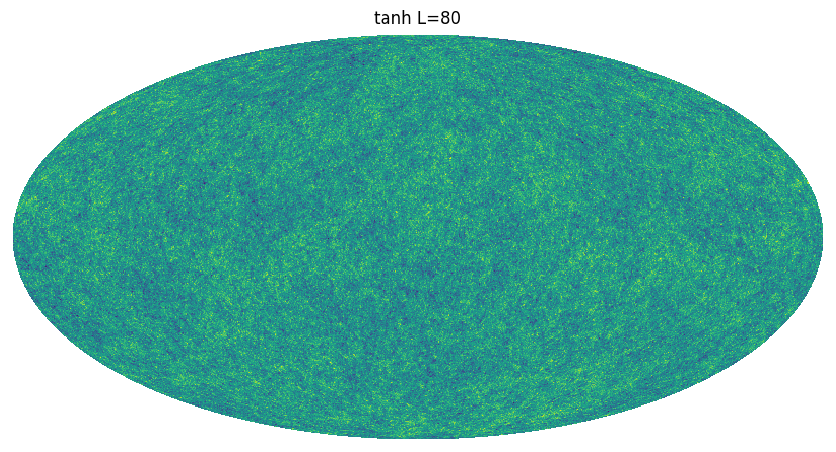

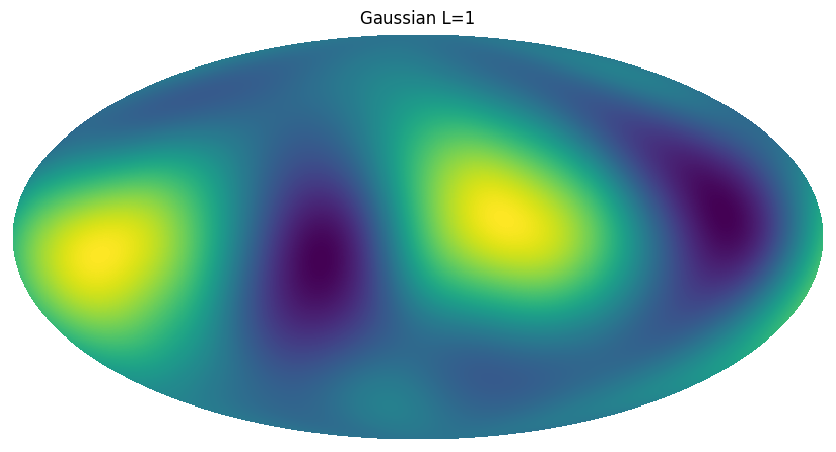

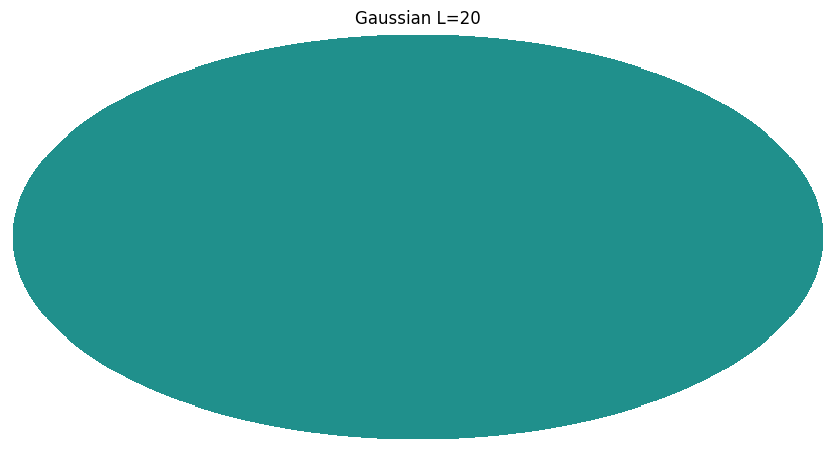

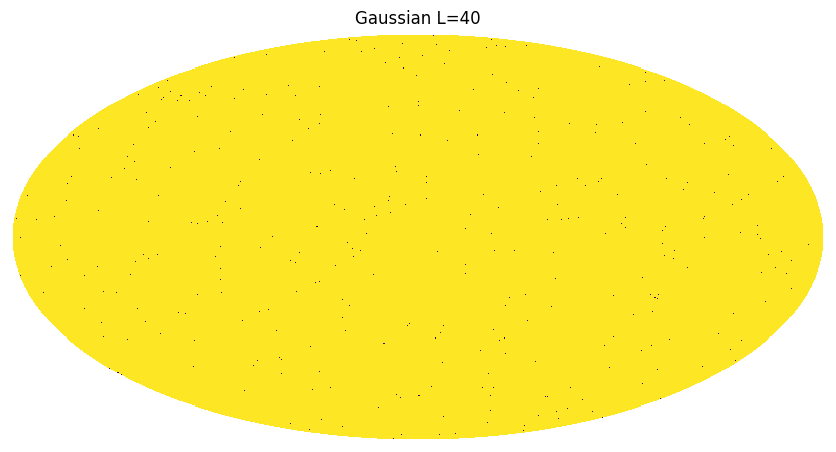

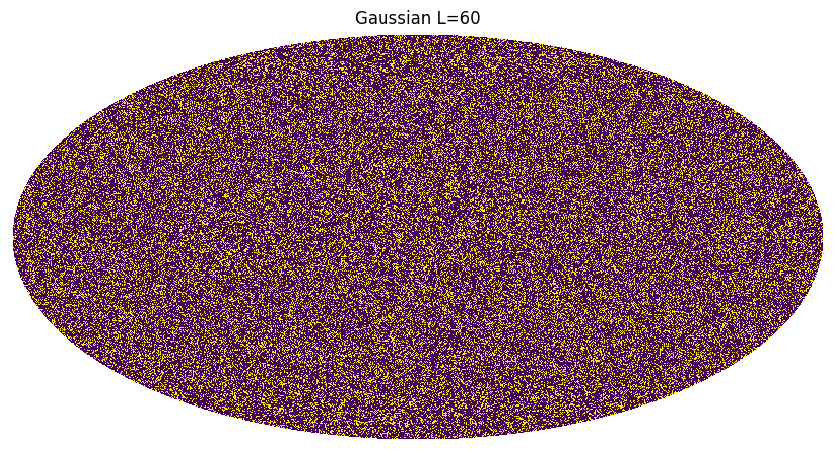

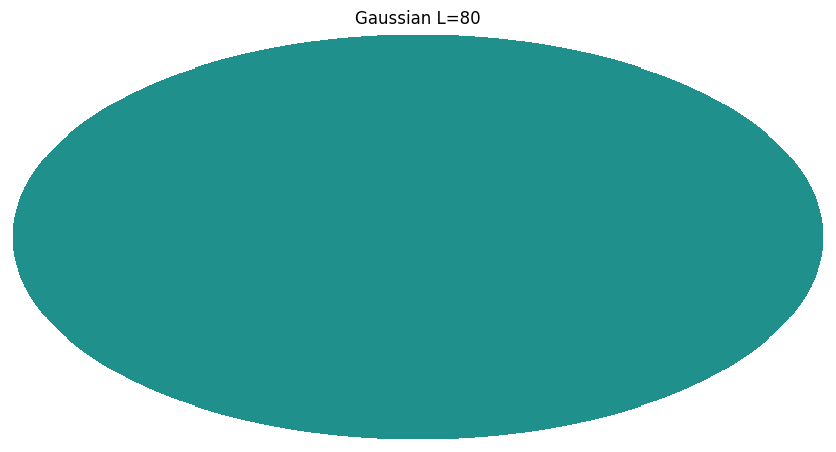

In [3]:
act_field=[ os.path.join(path_root,'res'+str(res),act+'_'+str(n),'mean') for act in Activation]

relu = os.path.join(path_root,'ReLu_1000/mean/')
tanh = os.path.join(path_root,'tanh_1000/mean/')
minus = os.path.join(path_root,'Gaussian_1000/mean/')
for N,file in enumerate(act_field):
    for L in L_list:
        hp.mollview(np.round(hp.read_map(os.path.join(file,str(L)+'_'+str(n)+'.fits')),3),cbar= None,title=str(Activation[N]) +' L='+str(L))
        plt.savefig(os.path.join(path_out, Activation[N]+'_'+str(L)+'.pdf'))


Range di variazione

In [4]:
range_file=[ os.path.join(path_root,'res'+str(res),act+'_'+str(n),'range.csv') for act in Activation]

for N,file in enumerate(range_file):
    data = pd.read_csv(file)
    print(Activation[N])
    for L in L_list:
        L = str(L)
        print(L+'\t', np.round(np.mean(data["min "+L]),5),'\t',np.round(np.mean(data["max "+L]),5))
    print('\n')

ReLu
1	 -1.46433 	 1.53117
20	 -0.57855 	 0.69359
40	 -0.42578 	 0.46043
60	 -0.43158 	 0.29306
80	 -0.37657 	 0.26124


tanh
1	 -1.73473 	 1.73473
20	 -2.92493 	 2.92493
40	 -3.9283 	 3.9283
60	 -4.65288 	 4.65288
80	 -4.88463 	 4.88463


Gaussian
1	 -0.5536 	 0.64094
20	 0.00013 	 0.00016
40	 0.07904 	 0.07904
60	 -0.0072 	 -0.0072
80	 0.00992 	 0.00993




Plot distribution

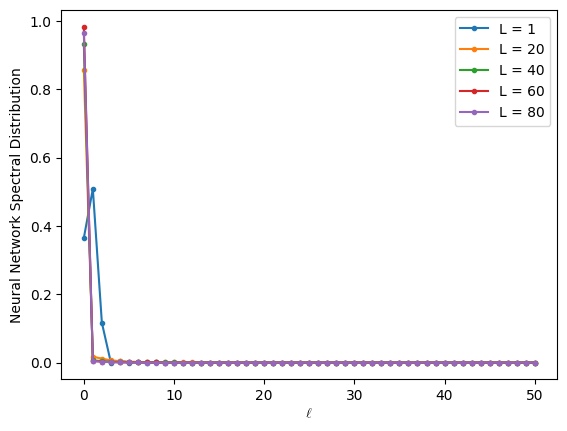

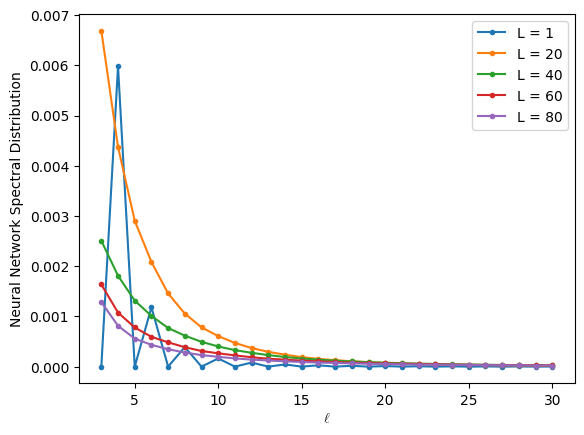

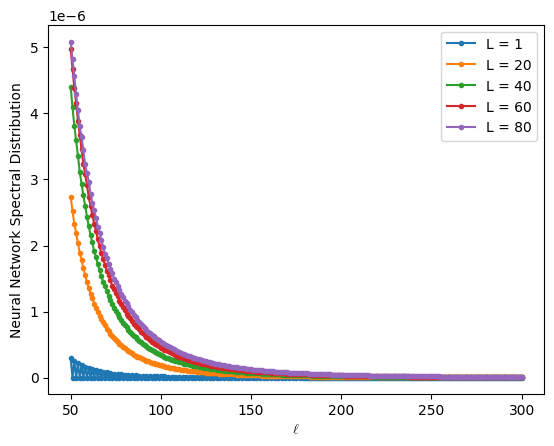

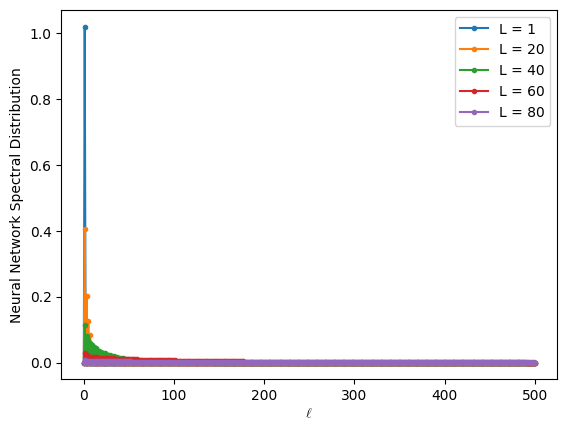

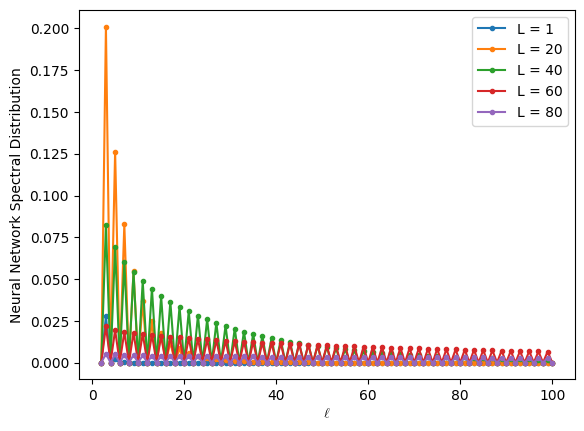

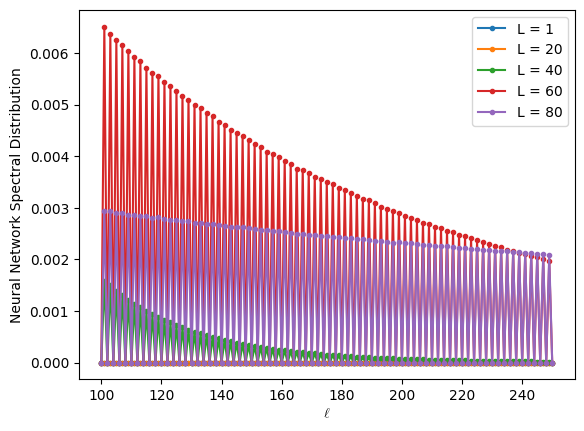

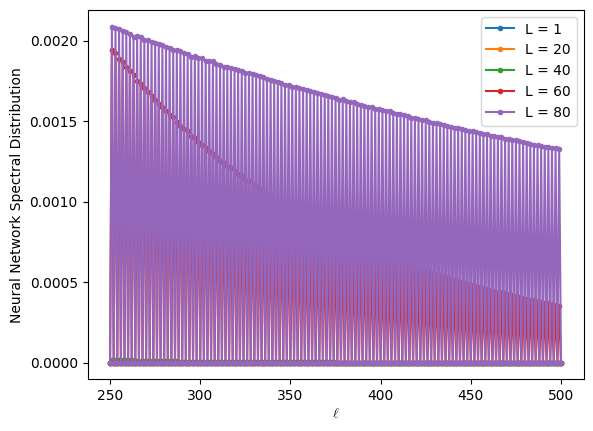

In [5]:
ReLu =  NeuralNetwork('ReLu',res,L_list, n)
ReLu.mean_sperimental()

# for normalization
# norma  = np.sum(ReLu.cl.distribution_sper,axis=1)
# cc = ReLu.cl.distribution_sper
# for i in range(len(ReLu.cl.distribution)):
#     cc[i] = cc[i]/norma[i]
# ReLu.cl.distribution=cc

ReLu.cl.plot_sperimental(forma='.-',ini=0,fine =50,dir='plot/ReLu1.pdf')
ReLu.cl.plot_sperimental(forma='.-',ini=3,fine =30,dir='plot/ReLu2.pdf')
ReLu.cl.plot_sperimental(forma='.-', ini=50, fine =300,dir='plot/ReLu3.pdf')


tanh  = NeuralNetwork('tanh',res,L_list,n)
tanh.mean_sperimental()

# for normalization
# norma  = np.sum(tanh.cl.distribution_sper,axis=1)
# cc = tanh.cl.distribution_sper
# for i in range(len(tanh.cl.distribution)):
#     cc[i] = cc[i]/norma[i]
# ReLu.cl.distribution=cc

tanh.cl.delete_even() # plot only even multipoles

tanh.cl.plot_sperimental('.-',ini=0,fine = 500,dir = 'plot/tanh_pari1.pdf')
tanh.cl.plot_sperimental('.-',ini=2,fine=100,dir = 'plot/tanh_pari2.pdf')
tanh.cl.plot_sperimental('.-',ini=100,fine=250,dir = 'plot/tanh_pari3.pdf')
tanh.cl.plot_sperimental(forma='.-',ini=250,fine=500,dir = 'plot/tanh_pari4.pdf')

Effective support and Effective dimension 

In [6]:
tanh  = NeuralNetwork('tanh',9,[1,20,40,60,80],1000)
tanh.mean_sperimental()

alpha_value = [.5,.6,.7,.8,.9,.99]
dim_auto = tanh.cl.dim_auto
sum_auto =np.cumsum(dim_auto)
col={'L' : tanh.L}
col2={'L' : tanh.L}

for alpha in alpha_value:
    vec = np.argmax(np.cumsum(tanh.cl.distribution_sper,axis=1)>=alpha,axis=1)
    col[round(1-alpha,5)] = vec
    vec2 =  [ sum_auto[i] for i in vec]
    col2[round(1-alpha,5)] = vec2
df = pd.DataFrame(col)
print('Tanh - Effective support')
print(df.to_string(index=False))

df2 = pd.DataFrame(col2)
print('\nTanh - Effective dimension')
print(df2.to_string(index=False))

ReLu  = NeuralNetwork('ReLu',9,[1,20,40,60,80],1000)
ReLu.mean_sperimental()

alpha_value = [0.99, 0.995,0.999,0.9995, 0.9999]
dim_auto = ReLu.cl.dim_auto
sum_auto =np.cumsum(dim_auto)
col={'L' : ReLu.L}
col2={'L' : ReLu.L}


norma  = np.sum(ReLu.cl.distribution_sper,axis=1)
cc = ReLu.cl.distribution_sper

for i in range(len(ReLu.cl.distribution_sper)):
    cc[i] = cc[i]/norma[i]

for alpha in alpha_value:
    vec = np.argmax(np.cumsum(cc,axis=1)>=alpha,axis=1)
    col[round(1-alpha,5)] = vec
    vec2 =  [ sum_auto[i] for i in vec]
    col2[round(1-alpha,5)] = vec2
df = pd.DataFrame(col)
print('\n\n\nReLU - Effective support')
print(df.to_string(index=False))

df2 = pd.DataFrame(col2)
print('\nReLU - Effective dimension')
print(df2.to_string(index=False))


Tanh - Effective support
 L  0.5  0.4  0.3  0.2  0.1  0.01
 1    1    1    1    1    1     1
20    3    3    5    7   11    35
40   15   21   29   41   61   149
60   77  105  143  199  297   607
80  395  537  723  975 1335     0

Tanh - Effective dimension
 L    0.5    0.4    0.3    0.2     0.1   0.01
 1      4      4      4      4       4      4
20     16     16     36     64     144   1296
40    256    484    900   1764    3844  22500
60   6084  11236  20736  40000   88804 369664
80 156816 289444 524176 952576 1784896      1



ReLU - Effective support
 L  0.01  0.005  0.001  0.0005  0.0001
 1     2      4      6       8      14
20     5      8     17      22      40
40     3      6     18      25      47
60     2      4     16      24      50
80     1      3     15      24      53

ReLU - Effective dimension
 L  0.01  0.005  0.001  0.0005  0.0001
 1     9     25     49      81     225
20    36     81    324     529    1681
40    16     49    361     676    2304
60     9     25    28